In [11]:
from collections import Mapping

def deep_update(source, overrides):
    """
    Update a nested dictionary or similar mapping.
    Modify ``source`` in place.
    """
    for key, value in overrides.items():
        if isinstance(value, Mapping) and value:
            returned = deep_update(source.get(key, {}), value)
            source[key] = returned
        else:
            source[key] = overrides[key]
    return source



d1= {
    "_id": {
        "$oid": "619866f42538fc14076eba48"
    },
    "trip": {
        "$oid": "619866f32538fc14076eba47"
    },
    "event": {
        "location": {
            "coordinates": [103.79839350407595, 1.27426303773784],
            "type": "Point"
        },
        "traversed_path": None,
        "state": "passenger_requested_trip"
    },
    "agent": {
        "type": "passenger",
        "id": {
            "$oid": "619866f22f90fcd43d42862e"
        }
    },
    "sim_clock": {
        "$date": "2020-01-01T08:00:00.000Z"
    },
    "run_id": "HlVRquRtQTtm",
    "_updated": {
        "$date": "2020-01-01T08:00:00.000Z"
    },
    "_created": {
        "$date": "2020-01-01T08:00:00.000Z"
    },
    "user": "619866f21f01e673d9238c63",
    "current_stats": {
        "distance": 0,
        "duration": 0,
        "speed": 0
    },
    "cumulative_stats": {
        "distance": 0,
        "duration": 0,
        "speed": 0
    },
    "counter": 0,
    "_etag": "eda8d31d7150d5438a3505a65d26f87a0cd32d26"
}

d2 = {
    "_updated": {
        "$date": "2021-01-01T08:00:00.000Z"
    },
    "user": "ABC",
    "current_stats": {
        'hello': {
            "world": "is beautiful"
        }
    },
    "event": {
        "location": {
            "coordinates": [0, 0]
        }
    }

}

d1 = deep_update(d1, d2)
print(d1)

{'_id': {'$oid': '619866f42538fc14076eba48'}, 'trip': {'$oid': '619866f32538fc14076eba47'}, 'event': {'location': {'coordinates': [0, 0], 'type': 'Point'}, 'traversed_path': None, 'state': 'passenger_requested_trip'}, 'agent': {'type': 'passenger', 'id': {'$oid': '619866f22f90fcd43d42862e'}}, 'sim_clock': {'$date': '2020-01-01T08:00:00.000Z'}, 'run_id': 'HlVRquRtQTtm', '_updated': {'$date': '2021-01-01T08:00:00.000Z'}, '_created': {'$date': '2020-01-01T08:00:00.000Z'}, 'user': 'ABC', 'current_stats': {'distance': 0, 'duration': 0, 'speed': 0, 'hello': {'world': 'is beautiful'}}, 'cumulative_stats': {'distance': 0, 'duration': 0, 'speed': 0}, 'counter': 0, '_etag': 'eda8d31d7150d5438a3505a65d26f87a0cd32d26'}


In [8]:
from datetime import datetime, time, timedelta

dt = datetime(2020, 1, 1, 8, 0, 0)
tm = time(9, 0, 0)

tm, dt.time()

(datetime.time(9, 0), datetime.time(8, 0))

In [13]:
from collections import OrderedDict
import json

d = OrderedDict()
d['hello'] = 'world'

json.dumps(d)

'{"hello": "world"}'

In [8]:
import pandas as pd

scenario_folder = '/Users/rajiv/Development/iora/python/openroad/ride_hailing/apps/scenario'
input_data_folder = f"{scenario_folder}/comfort_delgro_2017/20171201_SvcDist2"

driver_df = pd.read_csv(f"{input_data_folder}/Driver_Sample.csv")
service = pd.read_csv(f"{input_data_folder}/service_dist.csv")


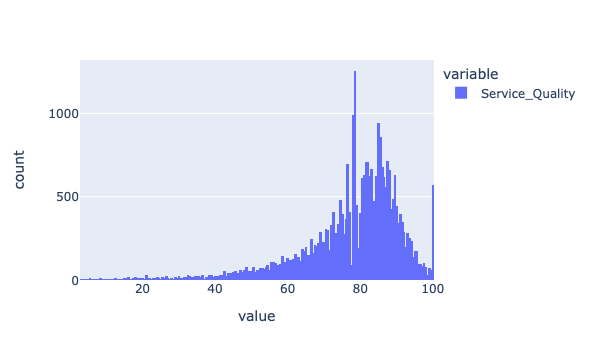

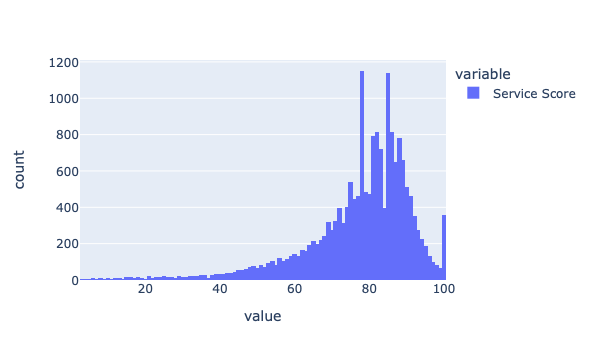

In [9]:
import plotly.express as px

px.histogram(driver_df['Service_Quality']).show()
px.histogram(service['Service Score']).show()

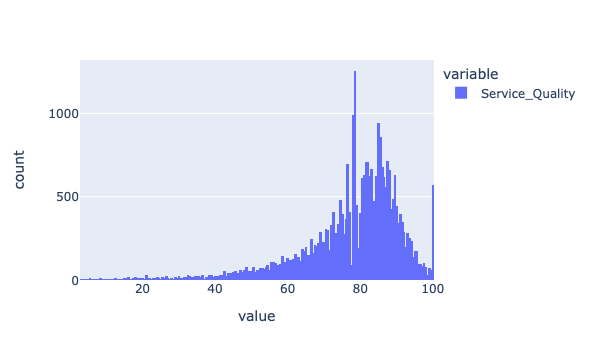

In [6]:
import numpy as np

svc_dist = list(service['Service Score'])

driver_df['Service_Quality'] = np.random.choice(svc_dist, size=len(driver_df))
px.histogram(driver_df['Service_Quality']).show()


In [7]:
driver_df.to_csv(f"{input_data_folder}/Driver_Sample.csv", index=False)